In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Bank_Customer_Churn.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [3]:
for i in ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"] :
  print(i," : ",df[i].unique())

Geography  :  ['France' 'Spain' 'Germany']
Gender  :  ['Female' 'Male']
NumOfProducts  :  [1 3 2 4]
HasCrCard  :  [1 0]
IsActiveMember  :  [1 0]
Exited  :  [1 0]


**Data Exploration**

Before Starting exploring our data, we should definitely remove the first three columns as we do not need the row id, customer id, nor their surnames

In [4]:
df = df.iloc[:, 3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let us now visualize some of our data : Basic Understanding of distributions

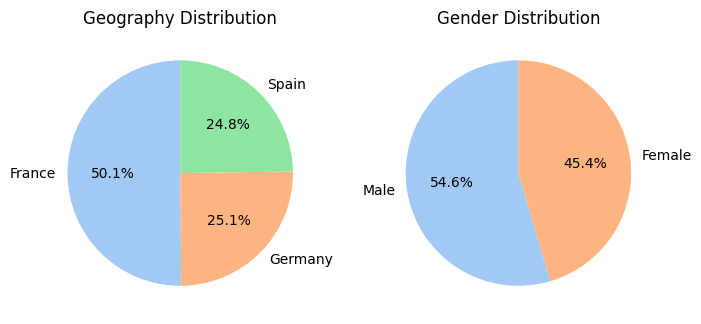

In [5]:
# Count the occurrences of each unique value in the 'Geography' column
geography_counts = df['Geography'].value_counts()

# Count the occurrences of each unique value in the 'Gender' column
gender_counts = df['Gender'].value_counts()

# Use a built-in pastel color palette from Seaborn
pastel_colors = sns.color_palette('pastel')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart for geography distribution
axs[0].pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors)
axs[0].set_title('Geography Distribution')

# Pie chart for gender distribution
axs[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors)
axs[1].set_title('Gender Distribution')

# Display the pie charts
plt.show()

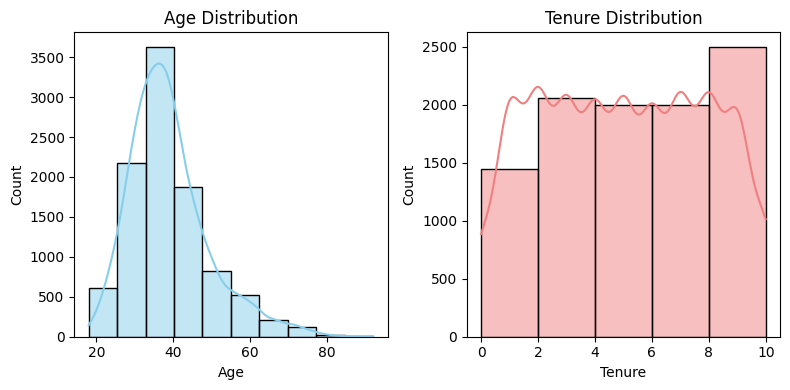

In [6]:
# Create a figure with two subplots (side by side) for histograms
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the histogram for Age on the left subplot
sns.histplot(data=df, x='Age', bins=10, color='skyblue', kde=True, ax=axs[0])
axs[0].set_title('Age Distribution')

# Plot the histogram for Tenure on the right subplot
sns.histplot(data=df, x='Tenure', bins=5, color='lightcoral', kde=True, ax=axs[1])
axs[1].set_title('Tenure Distribution')

# Display the histograms on the same line
plt.tight_layout()
plt.show()

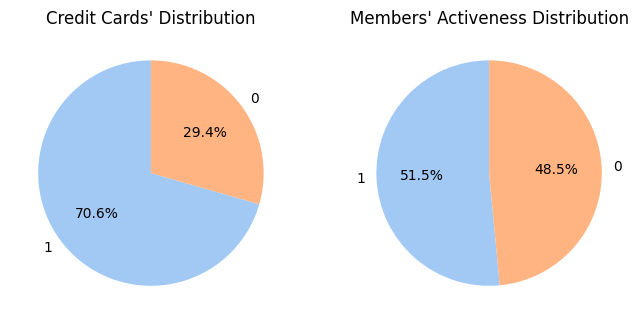

In [7]:
# Count the occurrences of each unique value in the 'HasCrCard' column
HasCrCard_counts = df['HasCrCard'].value_counts()

# Count the occurrences of each unique value in the 'IsActiveMember' column
IsActiveMember_counts = df['IsActiveMember'].value_counts()

# Use a built-in pastel color palette from Seaborn
pastel_colors = sns.color_palette('pastel')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart for HasCrCard distribution
axs[0].pie(HasCrCard_counts, labels=HasCrCard_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors)
axs[0].set_title('Credit Cards\' Distribution')

# Pie chart for IsActiveMember distribution
axs[1].pie(IsActiveMember_counts, labels=IsActiveMember_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors)
axs[1].set_title('Members\' Activeness Distribution')

# Display the pie charts
plt.show()

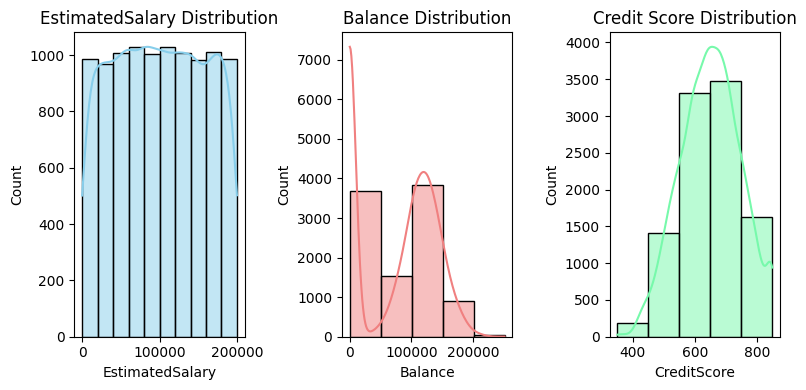

In [8]:
# Create a figure with three subplots (side by side) for histograms
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

# Plot the histogram for EstimatedSalary on the left subplot
sns.histplot(data=df, x='EstimatedSalary', bins=10, color='skyblue', kde=True, ax=axs[0])
axs[0].set_title('EstimatedSalary Distribution')

# Plot the histogram for Balance on the right subplot
sns.histplot(data=df, x='Balance', bins=5, color='lightcoral', kde=True, ax=axs[1])
axs[1].set_title('Balance Distribution')

# Plot the histogram for CreditScore on the right subplot
sns.histplot(data=df, x='CreditScore', bins=5, color='#77f9ab', kde=True, ax=axs[2])
axs[2].set_title('Credit Score Distribution')

# Display the histograms on the same line
plt.tight_layout()
plt.show()

**Coorelations and Features Importance**

<Axes: xlabel='IsActiveMember', ylabel='count'>

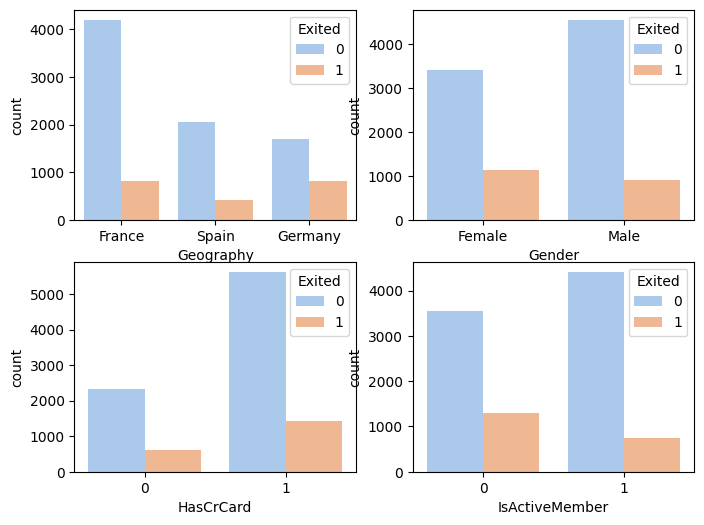

In [9]:
#  Categorical Variable X Target variable
fig, axarr = plt.subplots(2, 2, figsize=(8, 6))
sns.set_palette("pastel")
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

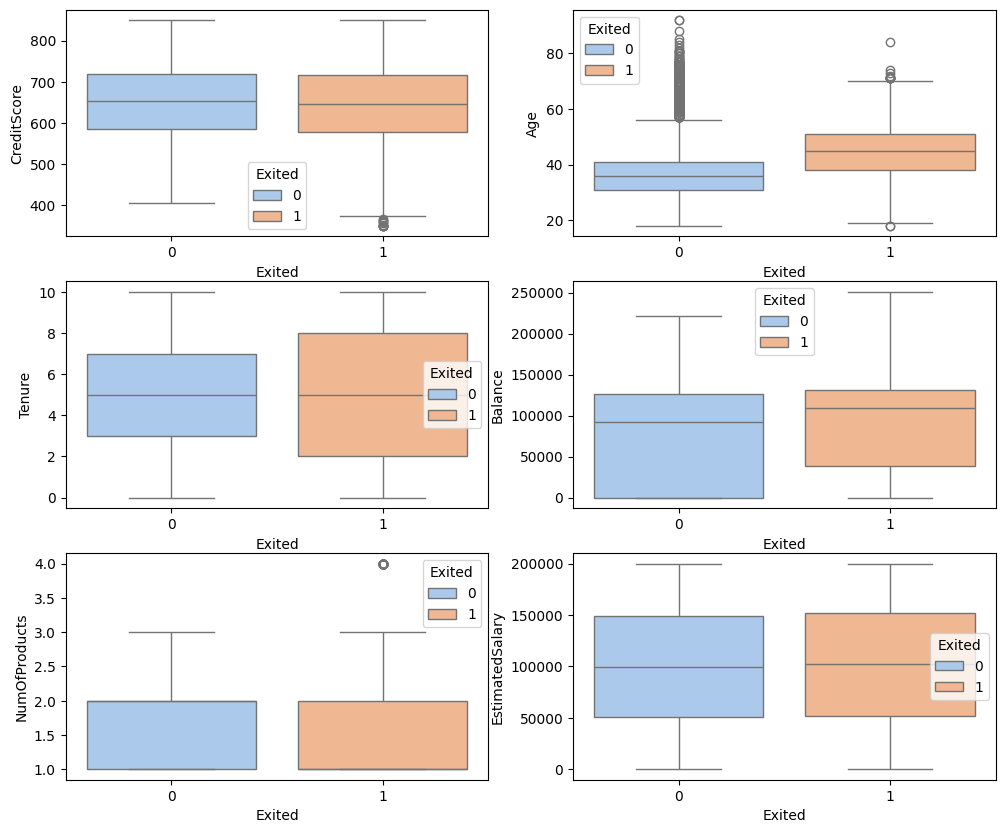

In [10]:
# Continuous data X target Variable
fig, axarr = plt.subplots(3, 2, figsize=(12, 10))
sns.set_palette("pastel")
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

**Feature Engineering**

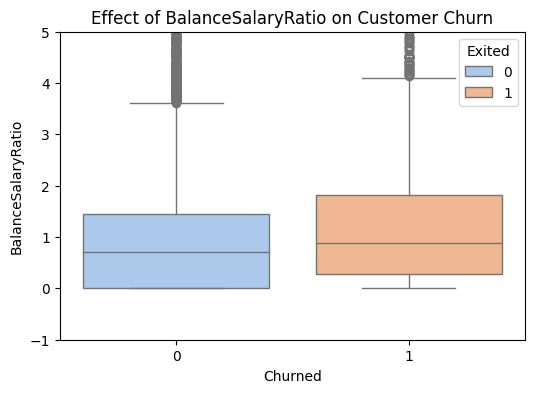

In [11]:
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Create the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='BalanceSalaryRatio', hue='Exited', data=df)
plt.ylim(-1, 5)
plt.xlabel('Churned')
plt.ylabel('BalanceSalaryRatio')
plt.title('Effect of BalanceSalaryRatio on Customer Churn')
plt.show()

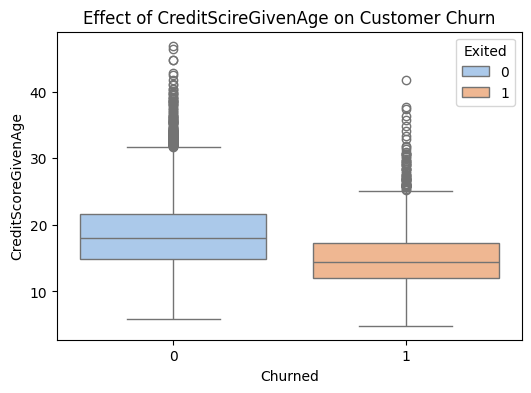

In [12]:
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)
# Create the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='CreditScoreGivenAge', hue='Exited', data=df)
plt.xlabel('Churned')
plt.ylabel('CreditScoreGivenAge')
plt.title('Effect of CreditScireGivenAge on Customer Churn')
plt.show()

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,19.767442


In [14]:
#One-Hot Encoding for Geography feature
df = pd.get_dummies(df, columns=['Geography'], prefix=['Geography'], dtype=int)

# Map "Gender" values to numerical values
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0.000000,14.738095,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0.744677,14.829268,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1.401375,11.952381,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0.000000,17.923077,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,1.587055,19.767442,0,0,1


**Data Splitting**

In [15]:
X = df.drop('Exited', axis=1).copy()
y = df['Exited'].copy()

print(X.shape)
print(y.shape)

(10000, 14)
(10000,)


In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [18]:
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [19]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 
              'max_iter': [250], 
              'fit_intercept':[True],
              'intercept_scaling':[1], 
              'penalty':['l2'], 
              'tol':[0.00001,0.0001,0.000001]
            }

log_Grid = GridSearchCV(
    LogisticRegression(solver='lbfgs'),
    param_grid, 
    cv=10, 
    refit=True, 
    verbose=0
)

log_Grid.fit(X_train,y_train)
best_model(log_Grid)

0.7887500000000001
{'C': 0.5, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.5, max_iter=250, tol=1e-05)


In [20]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 
              'max_iter': [300,500], 
              'fit_intercept':[True],
              'intercept_scaling':[1],
              'penalty':['l2'],
              'tol':[0.0001,0.000001]
}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(X_train)
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,y_train)
best_model(log_pol2_Grid)

0.814625
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 1e-06}
LogisticRegression(C=0.1, max_iter=300, solver='liblinear', tol=1e-06)


In [21]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 
              'gamma': [0.1,0.01,0.001],
              'probability':[True],
              'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train,y_train)
best_model(SVM_grid)

0.7944999935773219
{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=0.5, gamma=0.1, probability=True)


In [26]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,
                            min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [28]:
y_pred_test = log_Grid.predict(X_test)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.08      0.14       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



In [31]:
df_test_pol2 = poly2.transform(X_test)

y_pred_test_2 = log_pol2_Grid.predict(df_test_pol2)

print(classification_report(y_test, y_pred_test_2))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.21      0.31       393

    accuracy                           0.82      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.79      0.82      0.78      2000



In [32]:
y_pred_test_3 = SVM_grid.predict(X_test)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.08      0.14       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



In [33]:
y_pred_test_4 = RF.predict(X_test)
print(classification_report(y_test, y_pred_test_4))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

